# Stock Price Prediction


## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler


# load Dataset

In [2]:
df=pd.read_csv("Dataset/TATASTEEL.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,2020-11-23,TATASTEEL,EQ,532.90,538.00,546.00,536.35,541.65,543.10,541.60,17025425,9.220895e+14,170796.0,4370219.0,0.2567
5200,2020-11-24,TATASTEEL,EQ,543.10,547.95,550.45,541.40,548.25,548.30,546.47,13029126,7.119980e+14,143396.0,3811999.0,0.2926
5201,2020-11-25,TATASTEEL,EQ,548.30,551.00,558.65,539.50,541.00,541.25,548.88,17680989,9.704773e+14,181457.0,3397251.0,0.1921
5202,2020-11-26,TATASTEEL,EQ,541.25,546.00,571.10,541.25,569.40,568.40,556.10,22570185,1.255139e+15,218684.0,5928349.0,0.2627
5203,2020-11-27,TATASTEEL,EQ,568.40,570.00,582.35,563.05,574.90,577.35,575.57,46291248,2.664402e+15,258773.0,26434718.0,0.5711


In [5]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
data=df.filter(['Close'])

In [6]:
data.head()


,Close
Date,
2000-01-03,152.45
2000-01-04,150.80
2000-01-05,156.55
2000-01-06,168.25
2000-01-07,171.95


Text(0.5, 0, 'Date')

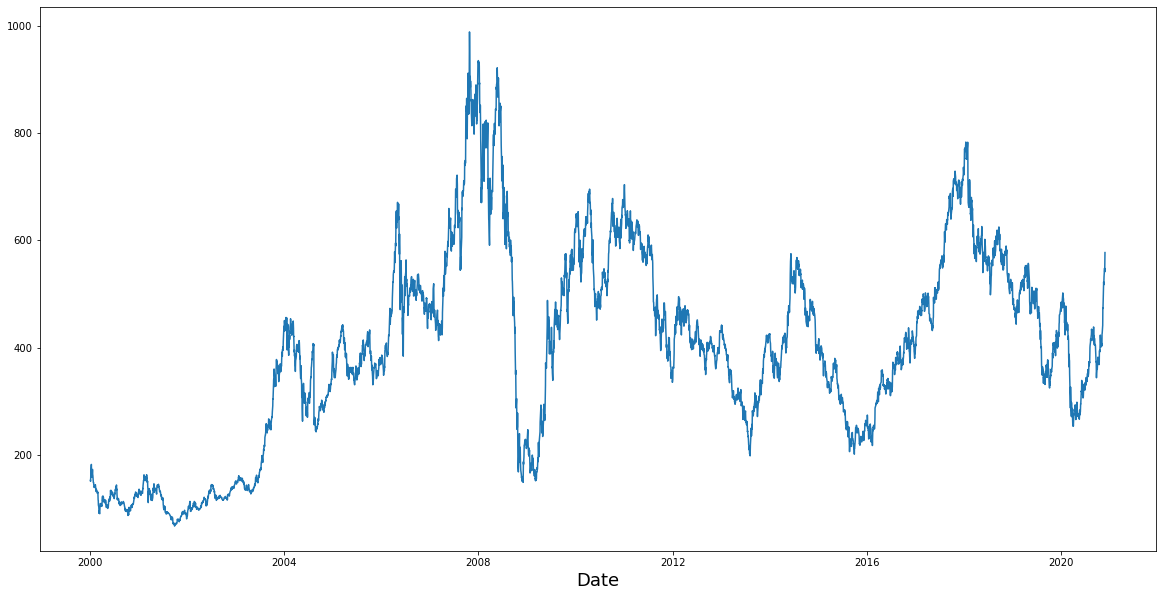

In [7]:
plt.plot(data)
plt.xlabel('Date',fontsize=18)

## Data Preprocessing

In [8]:
new_dataset=data.values
train_size=int(len(new_dataset)*.7)
valid_size=int(len(new_dataset)-train_size)
train_data=new_dataset[0:train_size,:]
valid_data=new_dataset[train_size:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
scaled_data

array([[0.0924429 ],
       [0.09065263],
       [0.09689144],
       ...,
       [0.51429501],
       [0.54375305],
       [0.5534639 ]])

In [9]:
len(new_dataset),len(train_data),len(valid_data)

(5204, 3642, 1562)

In [10]:
train_data = scaled_data[0:train_size,:]
x_train,y_train=[],[]

for i in range(100,len(train_data)):
    x_train.append(scaled_data[i-100:i,0])
    y_train.append(scaled_data[i,0])
    
##Converting to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
x_train.shape

(3542, 100)

In [12]:
##Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [14]:
#Compile Model
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
#Training Model
model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
56/56 [==============================] - 7s 66ms/step - loss: 0.0345: 0s - lo
Epoch 2/100
56/56 [==============================] - 4s 65ms/step - loss: 0.0012
Epoch 3/100
56/56 [==============================] - 4s 65ms/step - loss: 0.0011
Epoch 4/100
56/56 [==============================] - 4s 66ms/step - loss: 8.5907e-04
Epoch 5/100
56/56 [==============================] - 4s 67ms/step - loss: 8.6107e-04
Epoch 6/100
56/56 [==============================] - 4s 66ms/step - loss: 7.6164e-04
Epoch 7/100
56/56 [==============================] - 4s 68ms/step - loss: 6.8738e-04
Epoch 8/100
56/56 [==============================] - 5s 87ms/step - loss: 6.1157e-04
Epoch 9/100
56/56 [==============================] - 4s 73ms/step - loss: 6.0702e-04
Epoch 10/100
56/56 [==============================] - 4s 69ms/step - loss: 5.9361e-04
Epoch 11/100
56/56 [==============================] - 4s 70ms/step - loss: 6.1301e-04
Epoch 12/100
56/56 [==============================] - 4s 68ms/step

56/56 [==============================] - 4s 72ms/step - loss: 1.9057e-04
Epoch 97/100
56/56 [==============================] - 4s 73ms/step - loss: 1.8167e-04
Epoch 98/100
56/56 [==============================] - 5s 81ms/step - loss: 1.9618e-04
Epoch 99/100
56/56 [==============================] - 4s 74ms/step - loss: 1.7793e-04
Epoch 100/100
56/56 [==============================] - 4s 75ms/step - loss: 2.1469e-04


In [16]:
#create testing dataset 
test_data = scaled_data[train_size-100:,:]
#create data set x_test and y_test
x_test = []
y_test = new_dataset[train_size:,:]
for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])


In [17]:
#convert and reshape test data into numpy array
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
#get the model predicted values
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

In [19]:
#get the root means squared error
import math 
rmse = np.sqrt(np.mean(predicted_price - y_test)**2)
rmse

6.528051837916258

<ipython-input-20-2490ad579a01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predicted_price


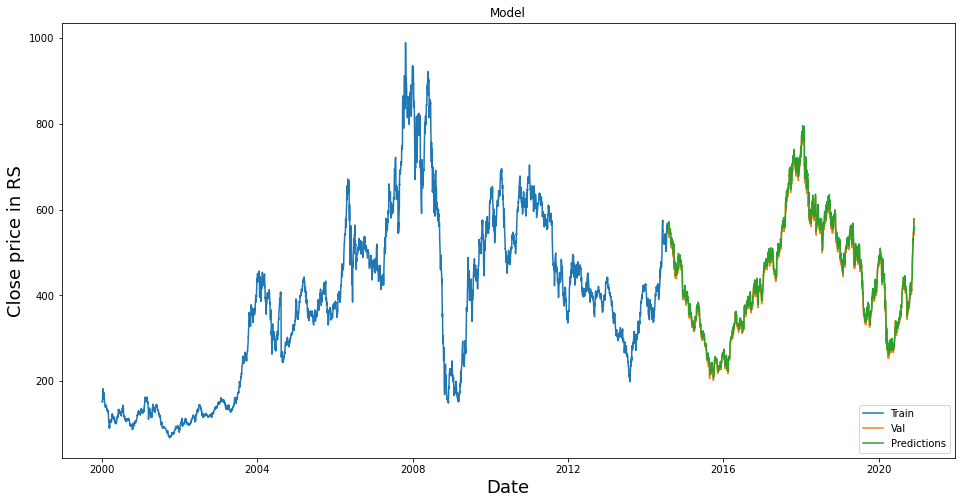

In [20]:
#Plot the data
train = data[:train_size]
valid = data[train_size:]
valid ['Predictions'] = predicted_price
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel("Close price in RS",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2014-08-04,551.85,558.368225
2014-08-05,562.20,560.643188
2014-08-06,550.50,571.531311
2014-08-07,555.80,559.002014
2014-08-08,537.70,563.470642
...,...,...
2020-11-23,543.10,542.031494
2020-11-24,548.30,553.119019
2020-11-25,541.25,558.470764


In [78]:
model.save("saved_model.h5")

In [64]:
import pandas_datareader as web
stock = web.DataReader('RELIANCE.NS',data_source='yahoo',start='2016-12-27',end='2020-12-25')

[[1893.5393]]


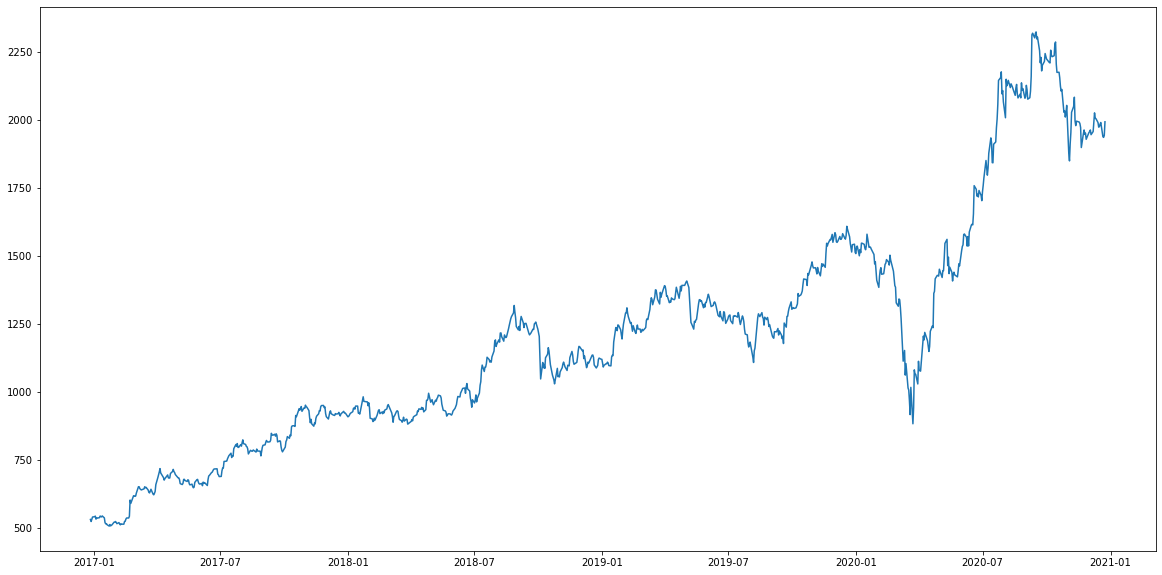

In [72]:
new_df = stock.filter(['Close'])
Last_60days = new_df[-60:].values
Last_60days_scaled=scaler.transform(Last_60days)
X_test = []
X_test.append(Last_60days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
plt.plot(new_df['Close)

In [67]:
stock1 = web.DataReader('RELIANCE.NS',data_source='yahoo',start='2020-01-05',end='2020-12-26')
print(stock1['Close'])

Date
2020-01-06    1501.500000
2020-01-07    1524.599976
2020-01-08    1513.150024
2020-01-09    1548.000000
2020-01-10    1547.650024
                 ...     
2020-12-18    1991.550049
2020-12-21    1939.699951
2020-12-22    1936.699951
2020-12-23    1943.849976
2020-12-24    1994.150024
Name: Close, Length: 243, dtype: float64
